# Exploratory Data Analysis

In this section we will dive into an exploratory analysis within the `Titanic - Machine Learning from Disaster` dataset. We will explore about the relations between the features, the distributions and their effects on the survival rates.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
train_data = pd.read_csv('../data/raw/train.csv')
test_data = pd.read_csv('../data/raw/test.csv')
submission_data = pd.read_csv('../data/raw/gender_submission.csv')

## Exploratory Analysis of Data Submission

* Divide training data into `x_train` and `y_train`.
* Combine the training data (`x_train` and `y_train`) for cohesive analysis.
* Combine features and target into a single dataset `train_test_data` for further exploratory data analysis.

In [5]:
y_train = train_data['Survived']
x_train = train_data.drop(columns=['Survived'])

y_test = submission_data['Survived']
x_test = test_data

In [8]:
y_data = pd.concat([y_train, y_test], axis=0, ignore_index=True)
x_data = pd.concat([x_train, x_test], axis=0, ignore_index=True)

train_test_data = pd.concat([x_data, y_data], axis=1)

In [9]:
train_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Exploring Survival Patterns Based on Categorical Variables

* Creates visual representation using stacked bar charts to compare survival outcomes across categorical attributes / features (`Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked`)
* Analyzing survival distribution to identify key patterns in dataset.

In [13]:
def plot_survival_by_feature(feature):
    # Group by feature and 'Survived'
    grouped_data = train_test_data.groupby([feature, 'Survived'])
    size_counts = grouped_data.size()

    # Change table format using unstack and make a plot object
    survival_counts = size_counts.unstack(fill_value=0)
    survival_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'purple'])

    plt.title(f'Survival and Non-Survival Counts by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(['Not Survived', 'Survived'], title='Survival Status', loc='upper left')

    plt.show()

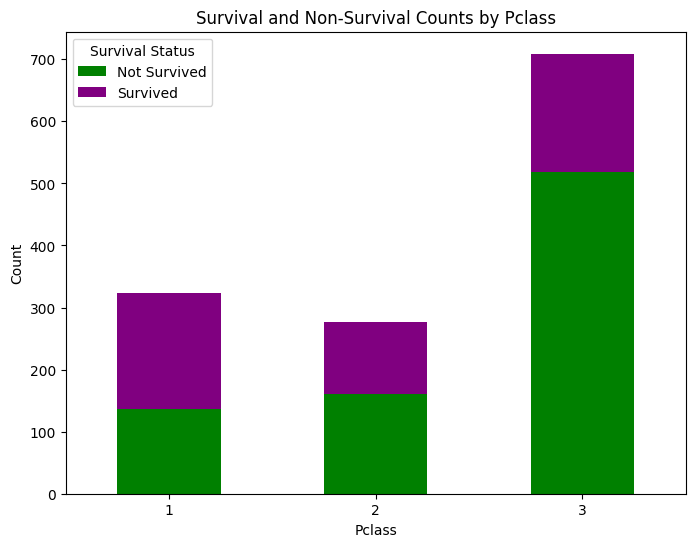

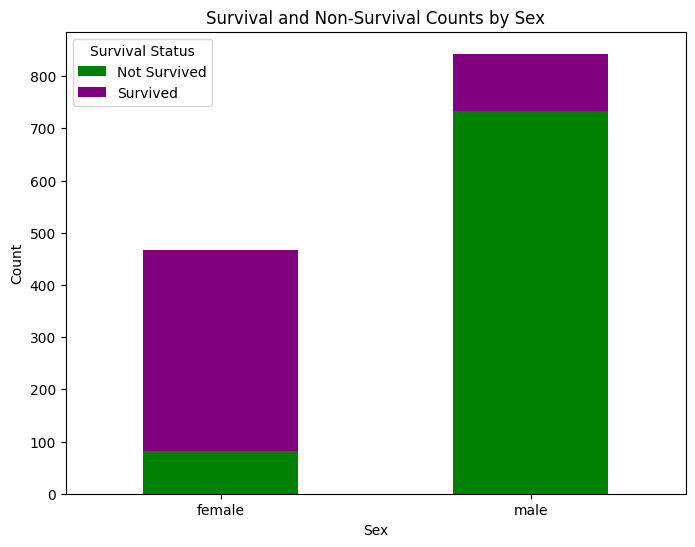

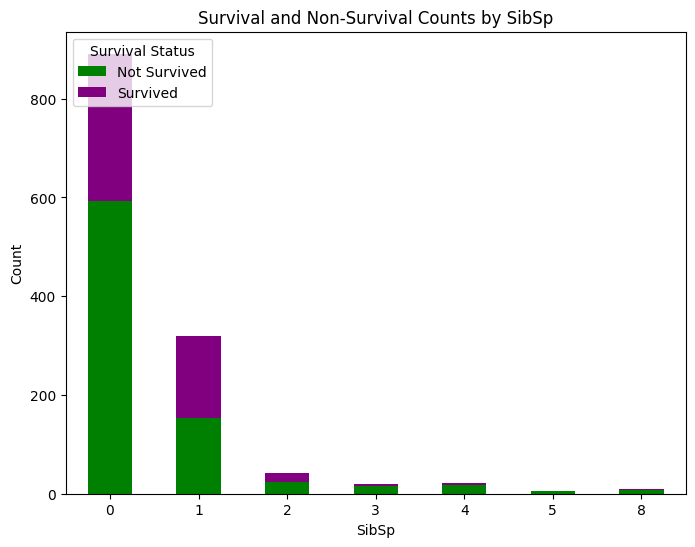

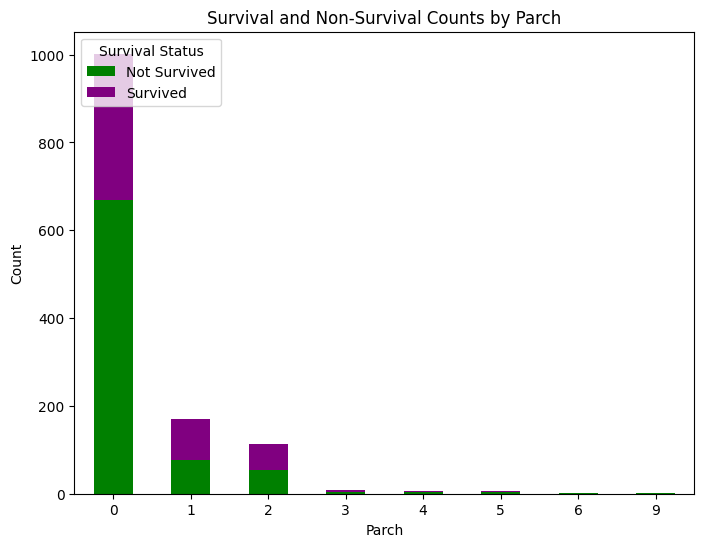

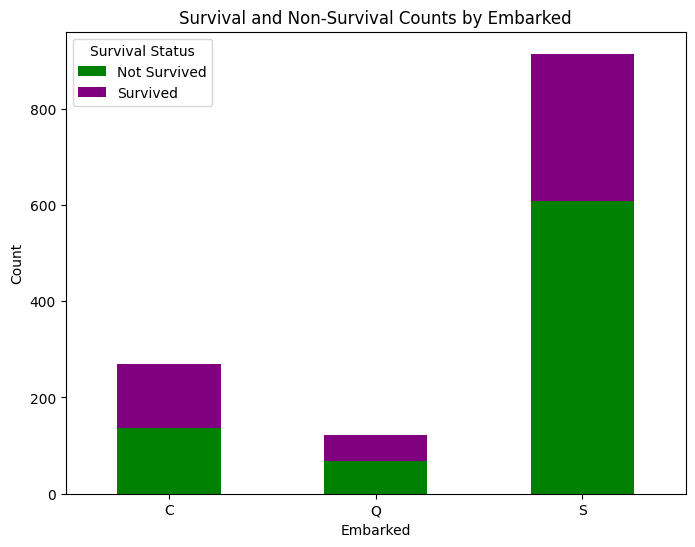

In [15]:
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for feature in categorical_features:
    plot_survival_by_feature(feature)